In [1]:
import pandas as pd 
import numpy as np 
import scipy.stats as st 
from scipy.interpolate import interp1d
from matplotlib import pyplot as plt 
import math
import statistics as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures 

In [6]:
data=pd.read_csv('MA_U.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
y=data.iloc[:,0]
w=data.iloc[:,1]
x=data.iloc[:,2]
z=data.iloc[:,3]
print(stats.stdev(x))
print(data)

0.3167700644927664
               A              B         C        D
0   5.759161e-26   4.936801e+36  45.32733  0.31478
1   1.404707e-33  4.984639e+123  44.51848  0.07224
2   7.385841e-37   1.149998e+99  44.32612  0.01430
3   7.385841e-37   1.149998e+99  44.69770  0.00526
4   2.265837e-24   7.124603e+86  44.30242  0.01505
..           ...            ...       ...      ...
65  1.724288e-29   6.596538e+18  44.54921  0.06313
66  8.711623e-21   1.539458e+65  44.65970  0.01427
67  1.373961e-53  6.769055e+147  44.79900  0.00287
68  3.704462e-20   1.616379e+32  44.18964  0.16066
69  4.605640e-50   2.134114e+75  44.25669  0.01856

[67 rows x 4 columns]


pendiente b1  -1.042310188728629e-11
intercepción b0 is 4.756059038722384e-10


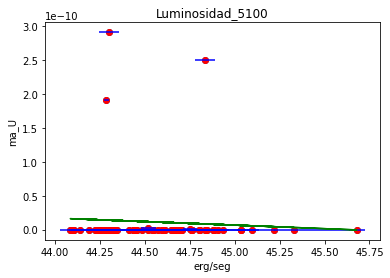

In [7]:
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = z
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_5100")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('ma_U')
plt.savefig("Luminosidad_5100_ma_U.pdf")

In [8]:
x=np.array(data.iloc[:,2:-1])
y=np.array(data.iloc[:,:-1])
x = x.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
print('Pendiente :' ,regression_model.coef_)
print('Intercepción:', regression_model.intercept_)
print('Errorcuadratico medio :',mse)
print('Raiz del error cuadratico medio: ', rmse)
print(' Coeficiente de determinacion R2 : ', r2)

Pendiente : [[-1.04231019e-011]
 [-5.62746626e+148]
 [ 1.00000000e+000]]
Intercepción: [ 4.75605904e-010  2.67731301e+150 -7.10542736e-015]
Errorcuadratico medio : 6.209404113105017e+299
Raiz del error cuadratico medio:  7.879977229094648e+149
 Coeficiente de determinacion R2 :  0.3347476479629248


In [10]:
data=pd.read_csv('MA_G.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
y=data.iloc[:,0]
z=data.iloc[:,2]
x=data.iloc[:,1]

print(stats.stdev(x))
print(data)

0.3180446978880407
               A         B        C
0   2.258040e-32  45.32733  0.31478
1   1.946127e-35  44.51848  0.07224
2   6.832871e-19  44.32612  0.01430
3   5.096099e-18  44.69770  0.00526
4   2.913186e-61  44.30242  0.01505
..           ...       ...      ...
74  1.195085e-21  44.78145  0.09942
75  4.059139e-37  44.77507  0.07369
76  9.200405e-24  44.36424  0.00708
77  3.073257e-41  44.17580  0.04911
78  9.714517e-49  44.40151  0.00523

[78 rows x 3 columns]


pendiente b1  1.3529824182828363
intercepción b0 is -60.03926219425225


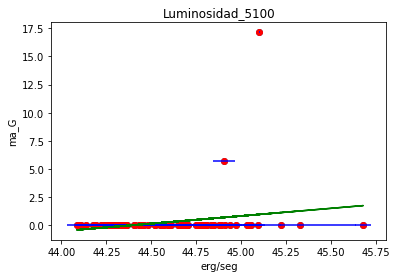

In [11]:
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = z
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_5100")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('ma_G')
plt.savefig("Luminosidad_5100_ma_G.pdf")

In [13]:
x=np.array(data.iloc[:,1:-1])
y=np.array(data.iloc[:,:-1])
x = x.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
print('Pendiente :' ,regression_model.coef_)
print('Intercepción:', regression_model.intercept_)
print('Errorcuadratico medio :',mse)
print('Raiz del error cuadratico medio: ', rmse)
print(' Coeficiente de determinacion R2 : ', r2)

Pendiente : [[1.35298242]
 [1.        ]]
Intercepción: [-6.00392622e+01  7.10542736e-15]
Errorcuadratico medio : 1.9613070318459904
Raiz del error cuadratico medio:  1.400466719292533
 Coeficiente de determinacion R2 :  0.5222623318743052


In [14]:
data=pd.read_csv('MA_R.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
y=data.iloc[:,0]
z=data.iloc[:,2]
x=data.iloc[:,1]

print(stats.stdev(x))
print(data)

0.31535848075411527
               A         B        C
0   1.321420e-47  45.32733  0.31478
1   3.119869e-75  44.51848  0.07224
2   1.569205e-16  44.32612  0.01430
3   1.873784e-23  44.69770  0.00526
4   3.556592e-20  44.30242  0.01505
..           ...       ...      ...
79  1.208600e-46  44.20654  0.02390
80  5.288202e-24  44.59746  0.00671
81  9.504214e-45  44.17015  0.06091
82  1.666591e-33  44.31297  0.01773
83  5.765731e-14  44.52867  0.01500

[83 rows x 3 columns]


pendiente b1  0.0026853844513682014
intercepción b0 is -0.11890322313736906


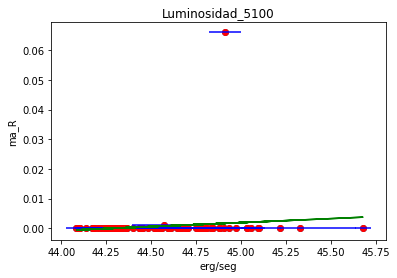

In [15]:
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = z
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_5100")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('ma_R')
plt.savefig("Luminosidad_5100_ma_R.pdf")

In [16]:
x=np.array(data.iloc[:,1:-1])
y=np.array(data.iloc[:,:-1])
x = x.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
print('Pendiente :' ,regression_model.coef_)
print('Intercepción:', regression_model.intercept_)
print('Errorcuadratico medio :',mse)
print('Raiz del error cuadratico medio: ', rmse)
print(' Coeficiente de determinacion R2 : ', r2)

Pendiente : [[0.00268538]
 [1.        ]]
Intercepción: [-1.18903223e-01  7.10542736e-15]
Errorcuadratico medio : 2.5569751347528382e-05
Raiz del error cuadratico medio:  0.005056654165308162
 Coeficiente de determinacion R2 :  0.5068327488612892


In [19]:
data=pd.read_csv('MA_I.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
y=data.iloc[:,0]
z=data.iloc[:,2]
x=data.iloc[:,1]

print(stats.stdev(x))
print(data)

0.2983432323274103
               A         B        C
0   2.559298e-39  45.32733  0.31478
1   5.874771e-33  44.51848  0.07224
2   5.374588e-14  44.32612  0.01430
3   3.740092e-22  44.69770  0.00526
5   9.751131e-15  44.83574  0.05485
..           ...       ...      ...
76  9.365095e-46  44.36424  0.00708
77  1.881692e-38  44.17580  0.04911
78  6.295043e-41  44.40151  0.00523
79  3.752484e-32  44.20654  0.02390
80  1.362047e-06  44.59746  0.00671

[75 rows x 3 columns]


pendiente b1  817680039.7248417
intercepción b0 is -36086420176.14872


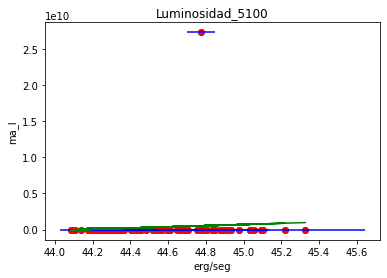

In [20]:
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = z
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_5100")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('ma_I')
plt.savefig("Luminosidad_5100_ma_I.pdf")

In [21]:
x=np.array(data.iloc[:,1:-1])
y=np.array(data.iloc[:,:-1])
x = x.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
print('Pendiente :' ,regression_model.coef_)
print('Intercepción:', regression_model.intercept_)
print('Errorcuadratico medio :',mse)
print('Raiz del error cuadratico medio: ', rmse)
print(' Coeficiente de determinacion R2 : ', r2)

Pendiente : [[8.1768004e+08]
 [1.0000000e+00]]
Intercepción: [-3.60864202e+10 -7.10542736e-15]
Errorcuadratico medio : 4.870489907132898e+18
Raiz del error cuadratico medio:  2206918645.3362746
 Coeficiente de determinacion R2 :  0.5029958975693338


In [22]:
data=pd.read_csv('MA_Z.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
y=data.iloc[:,0]
z=data.iloc[:,2]
x=data.iloc[:,1]

print(stats.stdev(x))
print(data)

0.31649267477025095
               A         B        C
0   7.626508e-51  45.32733  0.31478
1   7.157408e-20  44.51848  0.07224
2   2.566714e+00  44.32612  0.01430
3   1.685526e-02  44.69770  0.00526
4   2.081561e-31  44.30242  0.01505
..           ...       ...      ...
72  2.886584e-21  45.05713  0.05654
73  5.417949e-49  44.56043  0.21451
74  4.384755e-46  44.78145  0.09942
75  1.789820e-13  44.77507  0.07369
76  1.490723e-02  44.36424  0.00708

[76 rows x 3 columns]


pendiente b1  0.1323216137194062
intercepción b0 is -5.810822176039794


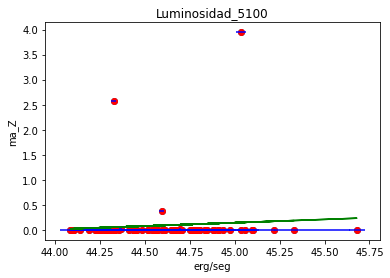

In [23]:
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = z
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_5100")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('ma_Z')
plt.savefig("Luminosidad_5100_ma_Z.pdf")

In [24]:
x=np.array(data.iloc[:,1:-1])
y=np.array(data.iloc[:,:-1])
x = x.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
print('Pendiente :' ,regression_model.coef_)
print('Intercepción:', regression_model.intercept_)
print('Errorcuadratico medio :',mse)
print('Raiz del error cuadratico medio: ', rmse)
print(' Coeficiente de determinacion R2 : ', r2)

Pendiente : [[0.13232161]
 [1.        ]]
Intercepción: [-5.81082218  0.        ]
Errorcuadratico medio : 0.14173816113134063
Raiz del error cuadratico medio:  0.37648128921812385
 Coeficiente de determinacion R2 :  0.5030342144629198
